### Data Analytics SCS 4204
# **Liver Patient Dataset Analysis - 18001149** 

**Title : Liver Patient Analysis**
  
  **Patient Status :**

### **DataFraming**

**Read .xlsx file into pandas**

### The Steps I am Following through for Data Analysis
**1)** <a href='#1'><strong>Data Analysis:</strong> </a> This is in general looking at the data to figure out whats going on. Inspect the data: Check whether there is any missing data, irrelevant data and do a cleanup.  

**2)** <a href='#2'><strong>Data Vizualization:</strong> </a>
     <li> <a href='#2.1'><small> 2.1) Data Transformation</small></a></li>
     <li> <a href='#2.2'><small> 2.2)  Data Vizualization Observationn</small></a></li>
     <li> <a href='#2.3'><small> 2.3)  Correlation Analyzation for the Liver Patient's Training Dataset</small></a></li>
     <li> <a href='#2.4'><small> 2.4)  Correlation Analyzation for the Liver Patient's Training Dataset</small></a></li>
     
**3)**<a href='#3'><strong>Feature selection:</strong> </a> 
    <li> <a href='#3.1'><small> 3.1) Logistic Regression</small></a></li>
    <li> <a href='#3.2'><small> 3.2) Gaussian Naive Bayes</small></a></li>
    <li> <a href='#3.3'><small> 3.3) Random Forest</small></a></li>
    <li> <a href='#3.4'><small> 3.4) KNN</small></a></li>
    <li> <a href='#3.5'><small> 3.5) Support Vector Machine</small></a></li>
    <li> <a href='#3.6'><small> 3.6) Gradient Boosting Classifier</small></a></li>
    <li> <a href='#3.6'><small> 3.7) XGB Classifier</small></a></li>

**4)** <a href='#4'><strong>Gradient Boosting gives us the best result so we will save this model for building Predictive Analysis.</strong> </a>
    <li> <a href='#4.1'><small> 4.1) Create Pickle File for Gradient Boosting Classifier</small></a></li>

**5)** <a href='#5'><strong>Creation of Linear Regression to make accurate model Based on Feature Importance.</strong> </a> 
    <li> <a href='#5.1'><small> 5.1) Feature Importance analysis for filter out important variables</small></a></li>
    <li> <a href='#5.2'><small> 5.2) Accurate Model Building with Liner regression with highest Important features</small></a></li>
    <li> <a href='#5.3'><small> 5.3) Newly Selected Features using for Logsitic Regression Model Building</small></a></li>

<a id='1'></a>
## 1)Data Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # For plots vizualization
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

from re import sub
import plotly
import plotly.express as px

plotly.offline.init_notebook_mode (connected = True)

#Plots vizualization and model_Training
from sklearn import metrics
from sklearn.model_selection import train_test_split
from PIL import Image 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
import random

#Falut Tolerance Procedure
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
liver_train = pd.read_excel(r"D:\\DC Universe\Ucsc\\Fourth Year\\SCS4204 Data Analytics\\Assignments\\Liver Patient\\SCS4204_Liver_dataset.xlsx")
liver_train.head(10)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,Yes
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490,60,68,7,3.3,0.89,Yes
3,4,58,Male,1,0.4,182,14,20,6.8,3.4,1,Yes
4,5,72,Male,3.9,2,195,27,59,7.3,2.4,0.4,Yes
5,6,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,Yes
6,7,26,Female,0.9,0.2,154,16,12,7,3.5,1,Yes
7,8,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.1,Yes
8,9,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.2,No
9,10,55,Male,0.7,0.2,290,53,58,6.8,3.4,1,Yes


### These are the independent and dependent vairables Liver patients health status
> **Dependent Variable** - `It's beign calculated by the Experts and provide and boolean answer whether the paitent is infected or Not`=> **Class** is the Depndent Variable in this Case

> 1.	**Age** - `Age of the patient`
2.	**Gender** - `Gender of the patient`
3.	**TB** - `Total Bilirubin`
4.	**DB** - `Direct Bilirubin`
5.	**ALK** - `Alkaline Phosphatase`
6.	**SGPT** - `Alamine Aminotransferase`
7.	**SGOT** - `Aspartate Aminotransferase`
8.	**TP** - `Total Proteins`
9.	**ALB** - `Albumin`
10.	**AG_Ratio** - `Albumin and Globulin Ratio`
11.	**Class** - `Used to split the data into two sets (labeled by the experts)`


In [3]:
liver_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        583 non-null    int64 
 1   Age       583 non-null    int64 
 2   Gender    583 non-null    object
 3   TB        583 non-null    object
 4   DB        583 non-null    object
 5   ALK       583 non-null    object
 6   SGPT      583 non-null    object
 7   SGOT      583 non-null    object
 8   TP        583 non-null    object
 9   ALB       583 non-null    object
 10  AG_Ratio  583 non-null    object
 11  Class     583 non-null    object
dtypes: int64(2), object(10)
memory usage: 54.8+ KB


In [4]:
liver_train.shape

(583, 12)


`Here is the observation from the dataset:   `

1) Only **ID and Age** gender is numeric variable. All others are `object` data types.   
2) There are `10 features and 1 output` - dataset.
In the Output I am hoping to introduce different mechanism.


>  **Value 1** indicates that the patient has liver disease and **0 indicates** the patient does not have liver disease.

`Testing Dataset consists of 311 samples.`

> **It's in the excel files sheet name called - Testing Dataset.** Using the training sample for do the model training and findning the accuray level of the dataset.


In [5]:
liver_test = pd.read_excel(open(r"D:\\DC Universe\Ucsc\\Fourth Year\\SCS4204 Data Analytics\\Assignments\\Liver Patient\\SCS4204_Liver_dataset.xlsx", 'rb'),
              sheet_name='Testing Dataset')

In [6]:
liver_test.shape

(311, 13)

In [7]:
liver_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           311 non-null    int64  
 1   Age          311 non-null    int64  
 2   Gender       311 non-null    object 
 3   TB           311 non-null    object 
 4   DB           311 non-null    object 
 5   ALK          311 non-null    object 
 6   SGPT         311 non-null    object 
 7   SGOT         311 non-null    object 
 8   TP           311 non-null    object 
 9   ALB          311 non-null    object 
 10  AG_Ratio     310 non-null    object 
 11  Class        311 non-null    object 
 12  Unnamed: 12  0 non-null      float64
dtypes: float64(1), int64(2), object(10)
memory usage: 31.7+ KB


In [8]:
del liver_test["Unnamed: 12"]
print("The DataFrame liver_test after deleting the column Unnamed: 12")

The DataFrame liver_test after deleting the column Unnamed: 12


In [9]:
liver_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        311 non-null    int64 
 1   Age       311 non-null    int64 
 2   Gender    311 non-null    object
 3   TB        311 non-null    object
 4   DB        311 non-null    object
 5   ALK       311 non-null    object
 6   SGPT      311 non-null    object
 7   SGOT      311 non-null    object
 8   TP        311 non-null    object
 9   ALB       311 non-null    object
 10  AG_Ratio  310 non-null    object
 11  Class     311 non-null    object
dtypes: int64(2), object(10)
memory usage: 29.3+ KB


In [10]:
liver_test.shape

(311, 12)

In [11]:
liver_test.head(10)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,Yes
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490,60,68,7,3.3,0.89,Yes
3,4,58,Male,1,0.4,182,14,20,6.8,3.4,1,Yes
4,5,72,Male,3.9,2,195,27,59,7.3,2.4,0.4,Yes
5,6,30,Female,0.9,0.3,202,15,11,6.7,3.1,1.1,Yes
6,7,17,Male,0.9,0.3,?,22,19,7.4,4.1,1.2,No
7,8,55,Male,0.7,0.2,290,53,58,6.8,3.4,1,Yes
8,9,64,Male,0.9,0.3,310,61,58,7,3.4,0.9,No
9,10,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.7,No


In [12]:
# Checking for null values
liver_train.isnull().sum()

ID          0
Age         0
Gender      0
TB          0
DB          0
ALK         0
SGPT        0
SGOT        0
TP          0
ALB         0
AG_Ratio    0
Class       0
dtype: int64

In [13]:
liver_test.AG_Ratio

0       0.9
1      0.74
2      0.89
3         1
4       0.4
       ... 
306    0.39
307     0.7
308     2.5
309       1
310       1
Name: AG_Ratio, Length: 311, dtype: object

`Here is the observation from the dataset:   `.

> Let's replace the "?" with 0 inorder to convert the object to numeric these features.

`["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]` are the features that will be converted to **numeric** 

In [14]:
liver_test = liver_test.replace('?', '0')

In [15]:
liver_test.head(100)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,Yes
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490,60,68,7,3.3,0.89,Yes
3,4,58,Male,1,0.4,182,14,20,6.8,3.4,1,Yes
4,5,72,Male,3.9,2,195,27,59,7.3,2.4,0.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,54,Male,0.8,0.2,218,20,19,6.3,2.5,0.6,Yes
96,97,54,Male,0.9,0.2,290,15,18,6.1,2.8,0.8,Yes
97,98,55,Male,1.8,9,272,22,79,6.1,2.7,0.7,Yes
98,99,55,Male,0.9,0.2,190,25,28,5.9,2.7,0.8,Yes


In [16]:
liver_test[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]] = liver_test[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]].apply(pd.to_numeric)

In [17]:
liver_test.dtypes

ID            int64
Age           int64
Gender       object
TB          float64
DB          float64
ALK           int64
SGPT          int64
SGOT          int64
TP          float64
ALB         float64
AG_Ratio    float64
Class        object
dtype: object

In [18]:
liver_test.isnull().sum()

ID          0
Age         0
Gender      0
TB          0
DB          0
ALK         0
SGPT        0
SGOT        0
TP          0
ALB         0
AG_Ratio    1
Class       0
dtype: int64

In [19]:
liver_mean=liver_test.mean()
liver_mean

ID          156.000000
Age          45.372990
TB            3.787138
DB            1.709646
ALK         276.025723
SGPT         77.093248
SGOT        103.067524
TP            6.613183
ALB           3.188746
AG_Ratio      0.934710
dtype: float64

>For Protecting the data accuracy in the dataset, Calculating the Mean Values of Each **Numeric Columns** and then replace them where data is 0 and "?".

In [20]:
#liver_test[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]].fillna(liver_mean)
# liver_test.fillna(liver_mean)

liver_test[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]]=liver_test[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]].replace(0,liver_test[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]].mean())

In [21]:
liver_test.head(10)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187.000000,16.0,18.0,6.8,3.3,0.90,Yes
1,2,62,Male,10.9,5.5,699.000000,64.0,100.0,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490.000000,60.0,68.0,7.0,3.3,0.89,Yes
3,4,58,Male,1.0,0.4,182.000000,14.0,20.0,6.8,3.4,1.00,Yes
4,5,72,Male,3.9,2.0,195.000000,27.0,59.0,7.3,2.4,0.40,Yes
5,6,30,Female,0.9,0.3,202.000000,15.0,11.0,6.7,3.1,1.10,Yes
6,7,17,Male,0.9,0.3,276.025723,22.0,19.0,7.4,4.1,1.20,No
7,8,55,Male,0.7,0.2,290.000000,53.0,58.0,6.8,3.4,1.00,Yes
8,9,64,Male,0.9,0.3,310.000000,61.0,58.0,7.0,3.4,0.90,No
9,10,25,Male,0.6,0.1,183.000000,91.0,53.0,5.5,2.3,0.70,No


#### Checking all the null data is beign replaced with Mean Values

In [22]:
#liver_test.to_csv('liver_test.csv',index=True)

In [23]:
# liver_train[["TB", "DB","ALK","SGPT","SGOT","TP","ALB"]] = liver_train[["TB", "DB","ALK","SGPT","SGOT","TP","ALB"]].apply(pd.to_numeric)

`Training Dataset consists of 583 samples.`

> **It's in the excel files sheet name called - Training Dataset.** Using the training sample for do the model training and findning the accuray level of the dataset.


In [24]:
liver_train = liver_train.replace('?', '0')

In [25]:
liver_train.head(100)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,Yes
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490,60,68,7,3.3,0.89,Yes
3,4,58,Male,1,0.4,182,14,20,6.8,3.4,1,Yes
4,5,72,Male,3.9,2,195,27,59,7.3,2.4,0.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,75,Male,0.9,0.2,282,25,23,4.4,2.2,1,Yes
96,97,39,Male,3.8,1.5,298,102,630,7.1,3.3,0.8,Yes
97,98,39,Male,6.6,3,215,190,950,4,1.7,0.7,Yes
98,99,18,Male,0.6,0.1,265,97,161,5.9,3.1,1.1,Yes


In [26]:
liver_train[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]] = liver_train[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]].apply(pd.to_numeric)

In [27]:
liver_train.dtypes

ID            int64
Age           int64
Gender       object
TB          float64
DB          float64
ALK           int64
SGPT          int64
SGOT          int64
TP          float64
ALB         float64
AG_Ratio    float64
Class        object
dtype: object

In [28]:
liver_mean2=liver_train.mean()
liver_mean2

ID          292.000000
Age          44.746141
TB            3.296226
DB            1.476501
ALK         290.065180
SGPT         80.641509
SGOT        109.885077
TP            6.463979
ALB           3.127616
AG_Ratio      0.944683
dtype: float64

In [29]:
liver_train[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]]=liver_train[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]].replace(0,liver_train[["TB", "DB","ALK","SGPT","SGOT","TP","ALB","AG_Ratio"]].mean())

In [30]:
liver_train.head(10)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,Yes
1,2,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,Yes
3,4,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,Yes
4,5,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,Yes
5,6,46,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,Yes
6,7,26,Female,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,Yes
7,8,29,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,Yes
8,9,17,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,No
9,10,55,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,Yes


### Checking nulls are diverted to mean values after doing the preprocessing Work

In [31]:
liver_train.isnull().sum()

ID          0
Age         0
Gender      0
TB          0
DB          0
ALK         0
SGPT        0
SGOT        0
TP          0
ALB         0
AG_Ratio    0
Class       0
dtype: int64

In [32]:
liver_test.head(10)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187.000000,16.0,18.0,6.8,3.3,0.90,Yes
1,2,62,Male,10.9,5.5,699.000000,64.0,100.0,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490.000000,60.0,68.0,7.0,3.3,0.89,Yes
3,4,58,Male,1.0,0.4,182.000000,14.0,20.0,6.8,3.4,1.00,Yes
4,5,72,Male,3.9,2.0,195.000000,27.0,59.0,7.3,2.4,0.40,Yes
5,6,30,Female,0.9,0.3,202.000000,15.0,11.0,6.7,3.1,1.10,Yes
6,7,17,Male,0.9,0.3,276.025723,22.0,19.0,7.4,4.1,1.20,No
7,8,55,Male,0.7,0.2,290.000000,53.0,58.0,6.8,3.4,1.00,Yes
8,9,64,Male,0.9,0.3,310.000000,61.0,58.0,7.0,3.4,0.90,No
9,10,25,Male,0.6,0.1,183.000000,91.0,53.0,5.5,2.3,0.70,No


In [33]:
liver_test.shape

(311, 12)

In [34]:
liver_test.dtypes

ID            int64
Age           int64
Gender       object
TB          float64
DB          float64
ALK         float64
SGPT        float64
SGOT        float64
TP          float64
ALB         float64
AG_Ratio    float64
Class        object
dtype: object

In [35]:
liver_train.shape

(583, 12)

<a id='2'></a>
# 2)Data Visualization

<a id='2.1'></a>
###  2.1) Data Transformation

`Importatnt Data Transformation in training dataset   `.

> Transforming Class of the Patient into Boolean values which are denoted according to these Criteria.

**Is a Liver`Patient**  Yes=>1 , **Not a Liver Patient** No=>0`
 

In [36]:
# label encoding
# liver_train=liver_train.replace({"Class":{'Yes':1,'No':0}},inplace=True)
# printing the first 5 rows of the dataframe

In [37]:
liver_train.shape

(583, 12)

In [38]:
liver_test.shape

(311, 12)

> **Scatter Matrix for Liver_train Dataset**

array([[<AxesSubplot:xlabel='ID', ylabel='ID'>,
        <AxesSubplot:xlabel='Age', ylabel='ID'>,
        <AxesSubplot:xlabel='TB', ylabel='ID'>,
        <AxesSubplot:xlabel='DB', ylabel='ID'>,
        <AxesSubplot:xlabel='ALK', ylabel='ID'>,
        <AxesSubplot:xlabel='SGPT', ylabel='ID'>,
        <AxesSubplot:xlabel='SGOT', ylabel='ID'>,
        <AxesSubplot:xlabel='TP', ylabel='ID'>,
        <AxesSubplot:xlabel='ALB', ylabel='ID'>,
        <AxesSubplot:xlabel='AG_Ratio', ylabel='ID'>],
       [<AxesSubplot:xlabel='ID', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='TB', ylabel='Age'>,
        <AxesSubplot:xlabel='DB', ylabel='Age'>,
        <AxesSubplot:xlabel='ALK', ylabel='Age'>,
        <AxesSubplot:xlabel='SGPT', ylabel='Age'>,
        <AxesSubplot:xlabel='SGOT', ylabel='Age'>,
        <AxesSubplot:xlabel='TP', ylabel='Age'>,
        <AxesSubplot:xlabel='ALB', ylabel='Age'>,
        <AxesSubplot:xlabel='AG_Ratio', ylabel='Age'>],
  

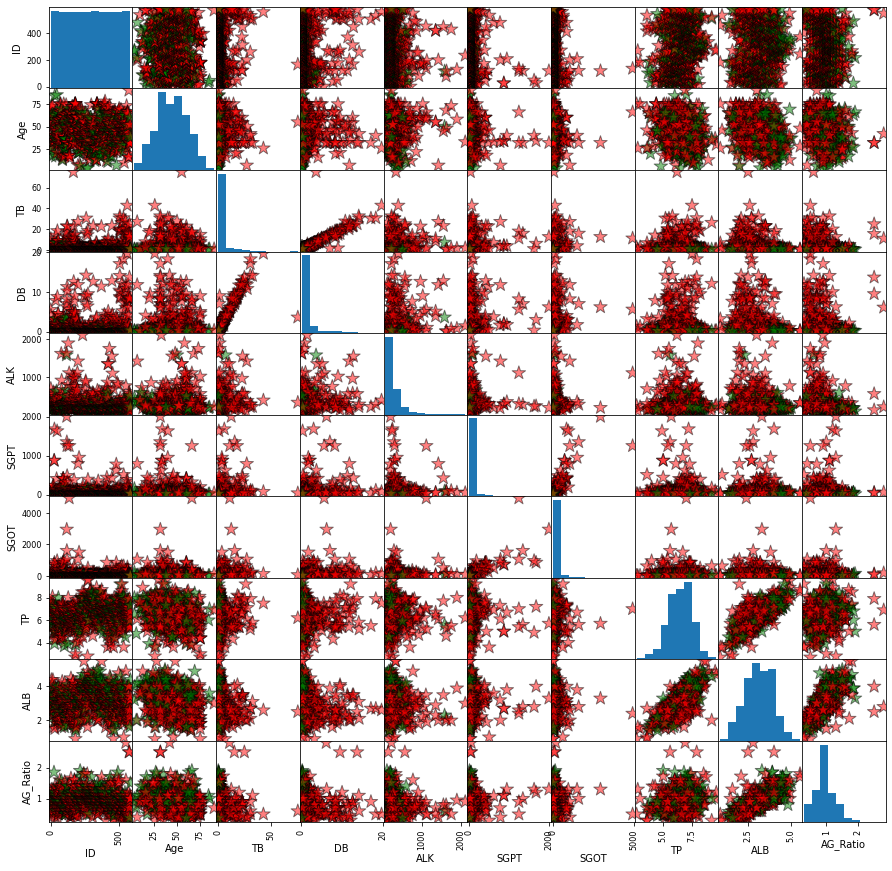

In [39]:
color_list = ['red' if i=='Yes' else 'green' for i in liver_train.loc[:,'Class']]
pd.plotting.scatter_matrix(liver_train.loc[:, liver_train.columns != 'Class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")

In [40]:
liver_test.shape

(311, 12)

## Gender against Class distribution in data

In [41]:
c=liver_train[['Gender','Class']].value_counts()

In [42]:
index=[]
for i in c.index:
    index.append(np.array(i))
index=np.array(index)

In [43]:
df=pd.DataFrame(columns=['Gender','Class','Values'])
df['Gender']=index[:,0]
df['Class']=index[:,1]
df['Values']=c.values

In [44]:
px.bar(data_frame=df,x='Gender',y='Values',color='Class')

In [45]:
liver_train[["Gender", "Class"]]=liver_train[["Gender", "Class"]].astype('string')

In [46]:
liver_train.dtypes

ID            int64
Age           int64
Gender       string
TB          float64
DB          float64
ALK         float64
SGPT        float64
SGOT        float64
TP          float64
ALB         float64
AG_Ratio    float64
Class        string
dtype: object

> For Test DatatSet **Gender-Class** Ratio Analysis

In [47]:
d=liver_test[['Gender','Class']].value_counts()

In [48]:
index=[]
for i in d.index:
    index.append(np.array(i))
index=np.array(index)

In [49]:
df2=pd.DataFrame(columns=['Gender','Class','Values'])
df2['Gender']=index[:,0]
df2['Class']=index[:,1]
df2['Values']=d.values

In [50]:
px.bar(data_frame=df2,x='Gender',y='Values',color='Class')

In [51]:
liver_test[["Gender", "Class"]]=liver_test[["Gender", "Class"]].astype('string')

In [52]:
liver_test.dtypes

ID            int64
Age           int64
Gender       string
TB          float64
DB          float64
ALK         float64
SGPT        float64
SGOT        float64
TP          float64
ALB         float64
AG_Ratio    float64
Class        string
dtype: object

In [53]:
liver_train.replace({"Class":{'Yes':1,'No':0}},inplace=True)
liver_train.replace({"Gender":{'Male':1,'Female':0}},inplace=True)
liver_train.head(10)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,2,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,3,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,4,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,5,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,6,46,1,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,7,26,0,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,1
7,8,29,0,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,9,17,1,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,0
9,10,55,1,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [54]:
liver_test.replace({"Class":{'Yes':1,'No':0}},inplace=True)
liver_test.head(10)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187.000000,16.0,18.0,6.8,3.3,0.90,1
1,2,62,Male,10.9,5.5,699.000000,64.0,100.0,7.5,3.2,0.74,1
2,3,62,Male,7.3,4.1,490.000000,60.0,68.0,7.0,3.3,0.89,1
3,4,58,Male,1.0,0.4,182.000000,14.0,20.0,6.8,3.4,1.00,1
4,5,72,Male,3.9,2.0,195.000000,27.0,59.0,7.3,2.4,0.40,1
5,6,30,Female,0.9,0.3,202.000000,15.0,11.0,6.7,3.1,1.10,1
6,7,17,Male,0.9,0.3,276.025723,22.0,19.0,7.4,4.1,1.20,0
7,8,55,Male,0.7,0.2,290.000000,53.0,58.0,6.8,3.4,1.00,1
8,9,64,Male,0.9,0.3,310.000000,61.0,58.0,7.0,3.4,0.90,0
9,10,25,Male,0.6,0.1,183.000000,91.0,53.0,5.5,2.3,0.70,0


In [55]:
liver_train.dtypes

ID            int64
Age           int64
Gender        int64
TB          float64
DB          float64
ALK         float64
SGPT        float64
SGOT        float64
TP          float64
ALB         float64
AG_Ratio    float64
Class         int64
dtype: object

### Data distribution for every column in liver_train dataset

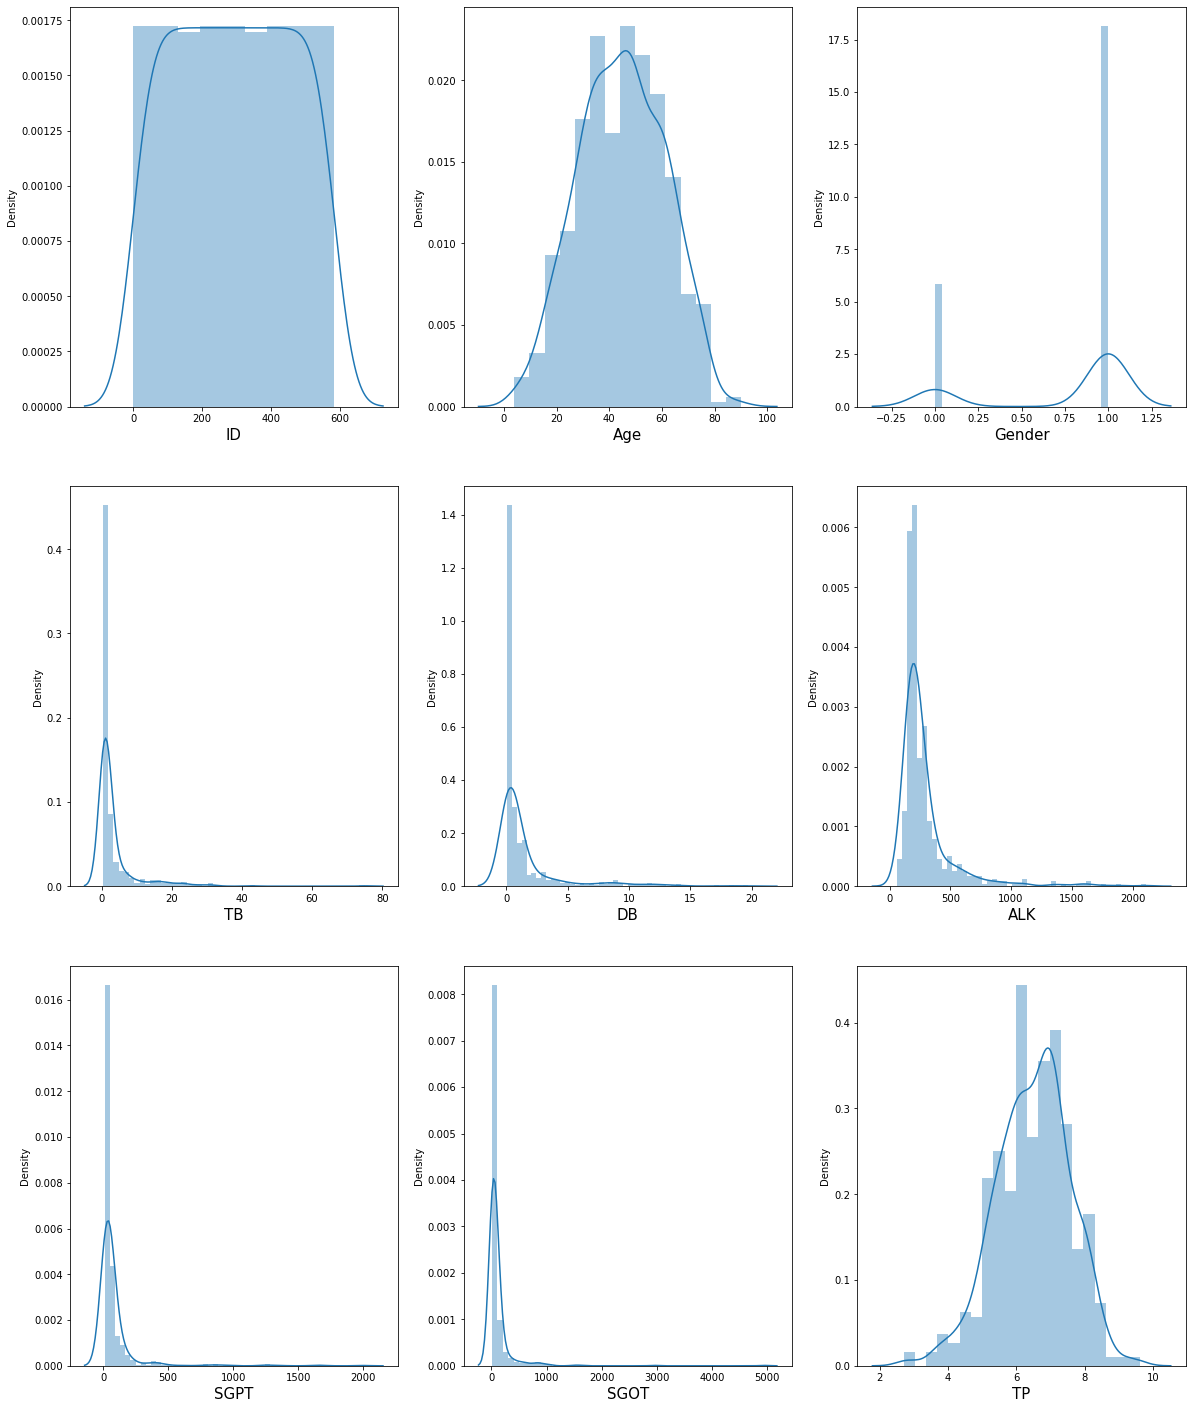

In [56]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 25))
plotnumber = 1
for column in liver_train:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(liver_train[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

In [57]:
def custom_round(x, base=10):
    return int(base * round(float(x)/base))

In [58]:
#liver_train['Age_round']=liver_train['Age'].apply(np.floor)
liver_train['Age_round']= liver_train['Age'].apply(lambda x: custom_round(x, base=10))

In [59]:
liver_train

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class,Age_round
0,1,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,60
1,2,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,60
2,3,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,60
3,4,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,60
4,5,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,579,60,1,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,0,60
579,580,40,1,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1,40
580,581,52,1,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1,50
581,582,31,1,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1,30


> This Diagram Representing the Ages based on 10 year gap to identify **Patient's Gender relatly Liver status**

1. Gender 1 Represents **Male**

2. Gender 0 Represents **Female**

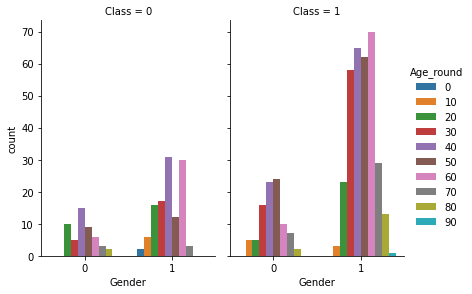

In [60]:
sns.catplot(x="Gender", hue="Age_round", col="Class",
                data=liver_train, kind="count",
                height=4, aspect=.7)

In [61]:
liver_train = liver_train.drop('Age_round', axis=1) # Run once to delete Age_round column
liver_train 

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,2,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,3,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,4,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,5,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,579,60,1,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,0
579,580,40,1,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1
580,581,52,1,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1
581,582,31,1,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1


Number of Female patients:  441
Number of Male patients:  142


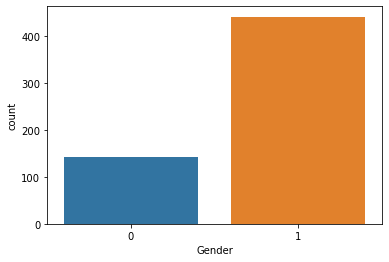

In [62]:
# Lung Cancer & Lung Cancer Count
import seaborn as sns

# fig = px.bar(models, x='Model', y='Test Score',text_auto='.2s')
# fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
# fig.show()

sns.countplot(data=liver_train, x = 'Gender', label='Count')

LD, NLD = liver_train['Gender'].value_counts()
print('Number of Female patients: ',LD)
print('Number of Male patients: ',NLD)

In [63]:
liver_train.replace({"Gender":{1:'Male',0:'Female'}},inplace=True)

In [64]:
liv=liver_train[['Gender', 'Class','Age']].groupby(['Class','Gender'], as_index=False).mean().sort_values(by='Class', ascending=False)

In [65]:
liv

,Class,Gender,Age
2,1,Female,43.347826
3,1,Male,46.950617
0,0,Female,42.740000
1,0,Male,40.598291


`Pie Chart Representation`

> Representation of gender distribution in Age,Gender in `Testing Dataset`

In [66]:
#liver_train['Age_round']=liver_train['Age'].apply(np.floor)
data_age= liv['Class']
labels = liv['Age']

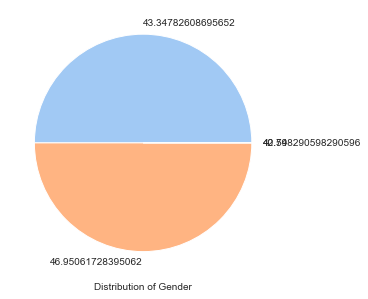

In [67]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))

colors = sns.color_palette('pastel')
ax.pie(data_age, labels=labels, colors=colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of Gender')
plt.show()

In [68]:
liver_test.dtypes

ID            int64
Age           int64
Gender       string
TB          float64
DB          float64
ALK         float64
SGPT        float64
SGOT        float64
TP          float64
ALB         float64
AG_Ratio    float64
Class         int64
dtype: object

### Data distribution for every column in liver_test dataset

In [69]:
liver_test.replace({"Gender":{'Male':1,'Female':0}},inplace=True)

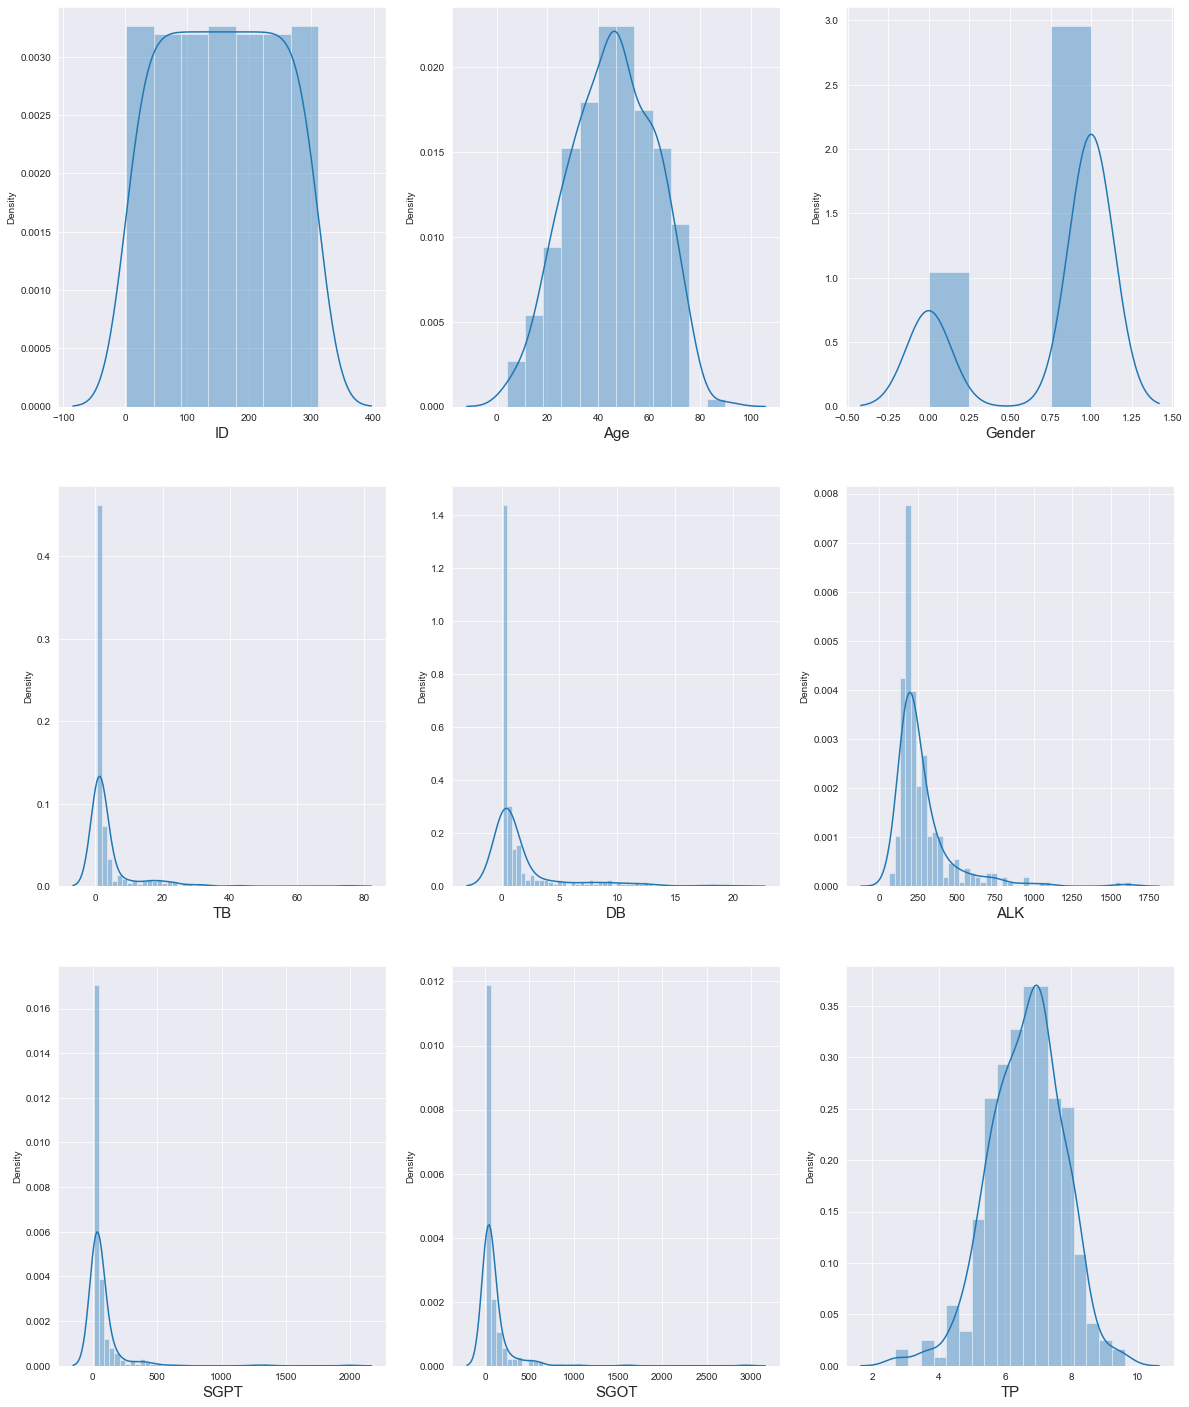

In [70]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 25))
plotnumber = 1
for column in liver_test:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(liver_test[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

### Factor Plot is used for categorize data according to Age vs Gender with Patient Status

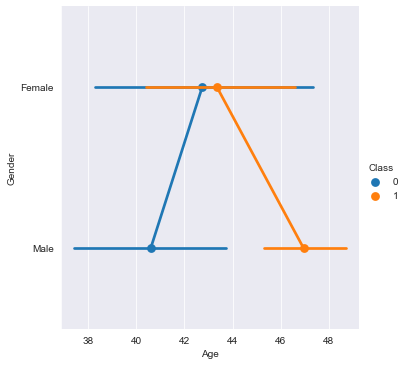

In [71]:
sns.factorplot(x="Age", y="Gender", hue="Class", data=liver_train)

### FaceGrid for the Class And Gender 

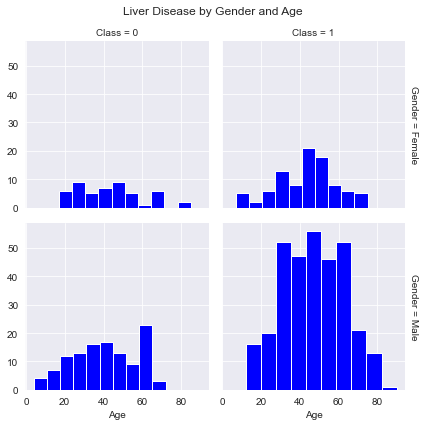

In [72]:
g = sns.FacetGrid(liver_train, col="Class", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="blue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Liver Disease by Gender and Age');

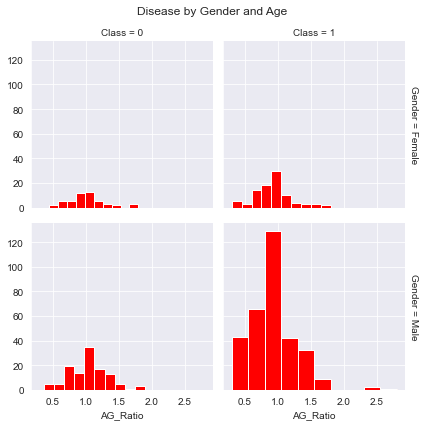

In [73]:
g = sns.FacetGrid(liver_train, col="Class", row="Gender", margin_titles=True)
g.map(plt.hist, "AG_Ratio", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

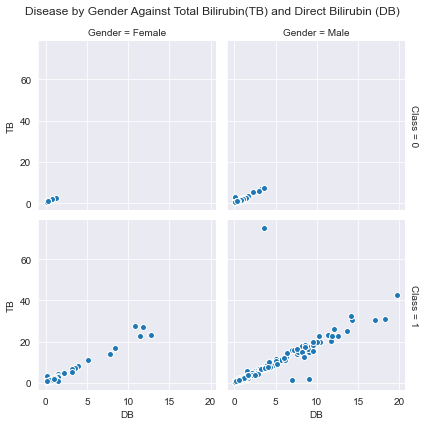

In [74]:
g = sns.FacetGrid(liver_train, col="Gender", row="Class", margin_titles=True)
g.map(plt.scatter,"DB", "TB", edgecolor="w")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender Against Total Bilirubin(TB) and Direct Bilirubin (DB)');

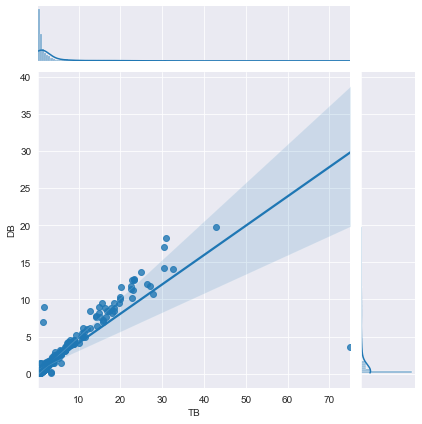

In [75]:
sns.jointplot("TB", "DB", data=liver_train, kind="reg")

There seems to be direct relationship between **Total Bilirubin(TB) and Direct Bilirubin (DB)**. We have the possibility of removing one of this feature.

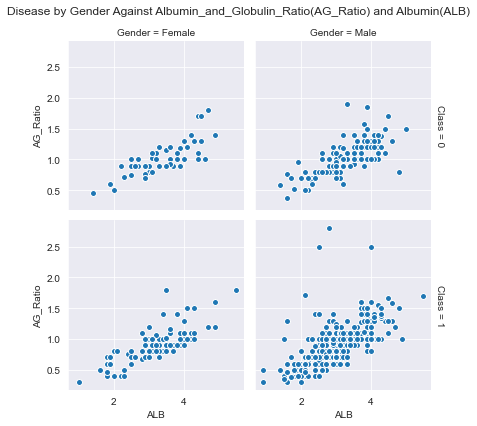

In [76]:
g = sns.FacetGrid(liver_train, col="Gender", row="Class", margin_titles=True)
g.map(plt.scatter,"ALB", "AG_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender Against Albumin_and_Globulin_Ratio(AG_Ratio) and Albumin(ALB)');

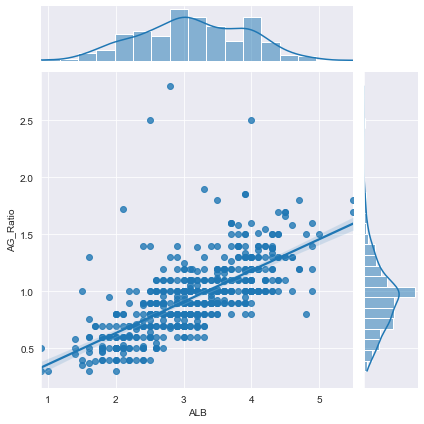

In [77]:
sns.jointplot("ALB", "AG_Ratio", data=liver_train, kind="reg")

> There is linear relationship between **Albumin_and_Globulin_Ratio(AG_Ratio) and Albumin(ALB)**. 

We have the possibility of removing one of this feature.

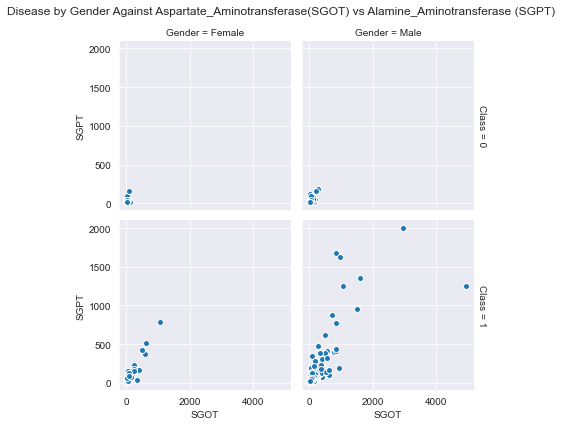

In [78]:
g = sns.FacetGrid(liver_train, col="Gender", row="Class", margin_titles=True)
g.map(plt.scatter,"SGOT", "SGPT",  edgecolor="w")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender Against Aspartate_Aminotransferase(SGOT) vs Alamine_Aminotransferase (SGPT)');

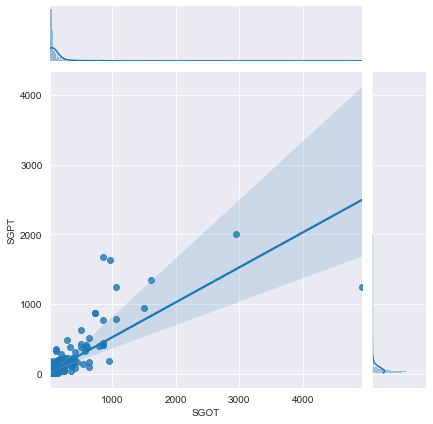

In [79]:
sns.jointplot("SGOT", "SGPT", data=liver_train, kind="reg")

> There is no linear relationship between **Aspartate_Aminotransferase(SGOT) vs Alamine_Aminotransferase (SGPT)** 


<a id='2.2'></a>
###  2.2) Data Vizualization Observation

#### From the above jointplots and scatterplots, we find direct relationship between the following features:  
>Direct_Bilirubin(DB) & Total_Bilirubin(TB)  
 Aspartate_Aminotransferase(SGOT) & Alamine_Aminotransferase(SGPT)  
 Albumin_and_Globulin_Ratio & Albumin  

**Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:**  
>Albumin  
 Total_Bilirubin 
 Albumin_and_Globulin_Ratio 
 Alamine_Aminotransferase  
 Total_Protiens  
 Albumin_and_Globulin_Ratio  
 Albumin  

Convert categorical variable **"Gender"** to indicator variables

In [80]:
liver_train.head(5)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,2,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,3,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,4,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,5,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [81]:
pd.get_dummies(liver_train['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


### Creating Dummy vaules to the Gender for Future Machine Learning model building

In [82]:
liver_train = pd.concat([liver_train,pd.get_dummies(liver_train['Gender'], prefix = 'Gender')], axis=1)

In [83]:
liver_train.describe()

,ID,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,292.000000,44.746141,3.307534,1.486631,291.060258,80.779831,110.073559,6.486154,3.138345,0.946303,0.713551,0.243568,0.756432
std,168.441879,16.189833,6.207717,2.807418,242.787997,182.613293,288.891696,1.083642,0.793265,0.318720,0.452490,0.429603,0.429603
min,1.000000,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000,0.000000
25%,146.500000,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000,0.000000,1.000000
50%,292.000000,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,437.500000,58.000000,2.650000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000,0.000000,1.000000
max,583.000000,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,1.000000,1.000000


In [84]:
liver_train.columns

Index(['ID', 'Age', 'Gender', 'TB', 'DB', 'ALK', 'SGPT', 'SGOT', 'TP', 'ALB',
       'AG_Ratio', 'Class', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [85]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
liver_train = liver_train.drop(['Gender'], axis=1) # Once it's beign run Comment this
liver_train.head(10)

,ID,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class,Gender_Female,Gender_Male
0,1,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,1,0
1,2,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,0,1
2,3,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,0,1
3,4,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,0,1
4,5,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,0,1
5,6,46,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1,0,1
6,7,26,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,1,1,0
7,8,29,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1,1,0
8,9,17,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,0,0,1
9,10,55,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1,0,1


### Test Data set Preprocessing for Model Validation
Same method used for the **dummy data** for Gender and concat into the **Liver_test** dataset.


In [86]:
liver_test.head(10)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,0,0.7,0.1,187.000000,16.0,18.0,6.8,3.3,0.90,1
1,2,62,1,10.9,5.5,699.000000,64.0,100.0,7.5,3.2,0.74,1
2,3,62,1,7.3,4.1,490.000000,60.0,68.0,7.0,3.3,0.89,1
3,4,58,1,1.0,0.4,182.000000,14.0,20.0,6.8,3.4,1.00,1
4,5,72,1,3.9,2.0,195.000000,27.0,59.0,7.3,2.4,0.40,1
5,6,30,0,0.9,0.3,202.000000,15.0,11.0,6.7,3.1,1.10,1
6,7,17,1,0.9,0.3,276.025723,22.0,19.0,7.4,4.1,1.20,0
7,8,55,1,0.7,0.2,290.000000,53.0,58.0,6.8,3.4,1.00,1
8,9,64,1,0.9,0.3,310.000000,61.0,58.0,7.0,3.4,0.90,0
9,10,25,1,0.6,0.1,183.000000,91.0,53.0,5.5,2.3,0.70,0


In [87]:
pd.get_dummies(liver_test['Gender'], prefix = 'Gender').head()

,Gender_0,Gender_1
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [88]:
liver_test.replace({"Gender":{1:'Male',0:'Female'}},inplace=True)

In [89]:
liver_test = pd.concat([liver_test,pd.get_dummies(liver_test['Gender'], prefix = 'Gender')], axis=1)

In [90]:
liver_test = liver_test.drop(['Gender'], axis=1) # Once it's beign run Comment this
liver_test.head(10)

,ID,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class,Gender_Female,Gender_Male
0,1,65,0.7,0.1,187.000000,16.0,18.0,6.8,3.3,0.90,1,1,0
1,2,62,10.9,5.5,699.000000,64.0,100.0,7.5,3.2,0.74,1,0,1
2,3,62,7.3,4.1,490.000000,60.0,68.0,7.0,3.3,0.89,1,0,1
3,4,58,1.0,0.4,182.000000,14.0,20.0,6.8,3.4,1.00,1,0,1
4,5,72,3.9,2.0,195.000000,27.0,59.0,7.3,2.4,0.40,1,0,1
5,6,30,0.9,0.3,202.000000,15.0,11.0,6.7,3.1,1.10,1,1,0
6,7,17,0.9,0.3,276.025723,22.0,19.0,7.4,4.1,1.20,0,0,1
7,8,55,0.7,0.2,290.000000,53.0,58.0,6.8,3.4,1.00,1,0,1
8,9,64,0.9,0.3,310.000000,61.0,58.0,7.0,3.4,0.90,0,0,1
9,10,25,0.6,0.1,183.000000,91.0,53.0,5.5,2.3,0.70,0,0,1


> **Preparation Dataset For the ML model Creation**  

<a id='2.3'></a>
### 2.3) Correlation Analyzation for the Liver Patient's Training Dataset

In [91]:
X=liver_train.loc[:, liver_train.columns != 'Class']

In [92]:
X.head(10)

,ID,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Gender_Female,Gender_Male
0,1,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,2,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0,1
2,3,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0,1
3,4,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0,1
4,5,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0,1
5,6,46,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,0,1
6,7,26,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,1,0
7,8,29,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1,0
8,9,17,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,0,1
9,10,55,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,0,1


In [93]:
Y = liver_train['Class']
Y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [94]:
# Correlation
liver_corr = X.corr()

In [95]:
liver_corr

,ID,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Gender_Female,Gender_Male
ID,1.000000,-0.052385,0.102095,0.137985,-0.079053,-0.124809,-0.094242,0.189350,0.062660,-0.024618,0.029633,-0.029633
Age,-0.052385,1.000000,0.013663,0.007452,0.081125,-0.087105,-0.020251,-0.188956,-0.263186,-0.215797,-0.056560,0.056560
TB,0.102095,0.013663,1.000000,0.873829,0.205349,0.213495,0.237247,-0.009656,-0.221124,-0.203787,-0.088443,0.088443
DB,0.137985,0.007452,0.873829,1.000000,0.232497,0.233469,0.257232,-0.001866,-0.228130,-0.198965,-0.099651,0.099651
ALK,-0.079053,0.081125,0.205349,0.232497,1.000000,0.125076,0.166418,-0.030013,-0.163522,-0.232345,0.028161,-0.028161
SGPT,-0.124809,-0.087105,0.213495,0.233469,0.125076,1.000000,0.791757,-0.043273,-0.028322,-0.001603,-0.082542,0.082542
SGOT,-0.094242,-0.020251,0.237247,0.257232,0.166418,0.791757,1.000000,-0.026916,-0.084915,-0.069382,-0.079350,0.079350
TP,0.189350,-0.188956,-0.009656,-0.001866,-0.030013,-0.043273,-0.026916,1.000000,0.780726,0.232719,0.088691,-0.088691
ALB,0.062660,-0.263186,-0.221124,-0.228130,-0.163522,-0.028322,-0.084915,0.780726,1.000000,0.682762,0.096577,-0.096577
AG_Ratio,-0.024618,-0.215797,-0.203787,-0.198965,-0.232345,-0.001603,-0.069382,0.232719,0.682762,1.000000,0.004831,-0.004831


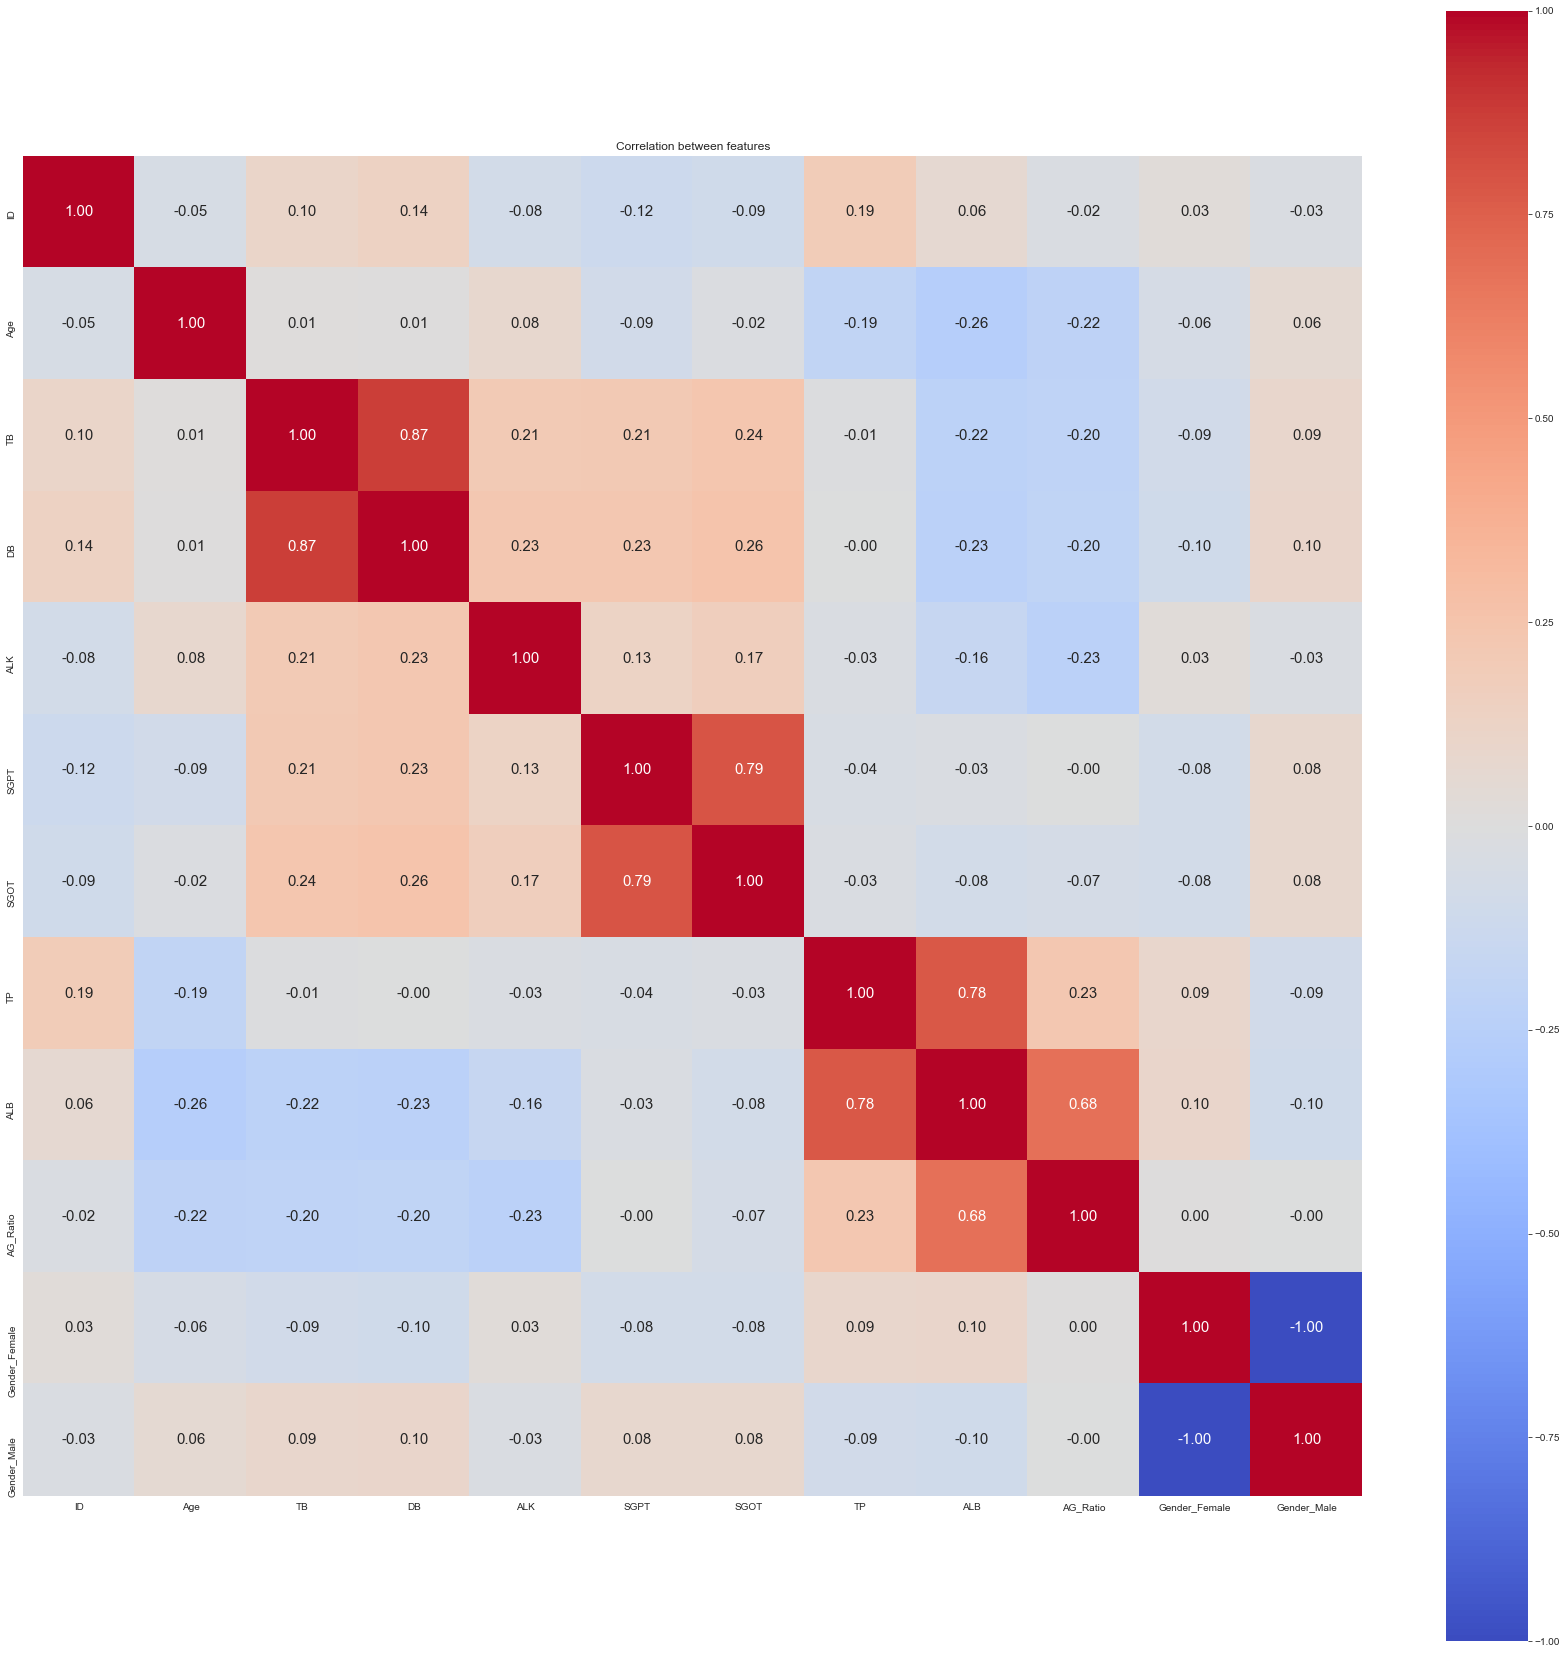

In [96]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

<a id='2.4'></a>
### 2.4) Correlation Analyzation for the Liver Patient's Testing Dataset

In [97]:
X_test=liver_test.loc[:, liver_test.columns != 'Class']

In [98]:
X_test.head(10)

,ID,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Gender_Female,Gender_Male
0,1,65,0.7,0.1,187.000000,16.0,18.0,6.8,3.3,0.90,1,0
1,2,62,10.9,5.5,699.000000,64.0,100.0,7.5,3.2,0.74,0,1
2,3,62,7.3,4.1,490.000000,60.0,68.0,7.0,3.3,0.89,0,1
3,4,58,1.0,0.4,182.000000,14.0,20.0,6.8,3.4,1.00,0,1
4,5,72,3.9,2.0,195.000000,27.0,59.0,7.3,2.4,0.40,0,1
5,6,30,0.9,0.3,202.000000,15.0,11.0,6.7,3.1,1.10,1,0
6,7,17,0.9,0.3,276.025723,22.0,19.0,7.4,4.1,1.20,0,1
7,8,55,0.7,0.2,290.000000,53.0,58.0,6.8,3.4,1.00,0,1
8,9,64,0.9,0.3,310.000000,61.0,58.0,7.0,3.4,0.90,0,1
9,10,25,0.6,0.1,183.000000,91.0,53.0,5.5,2.3,0.70,0,1


In [99]:
Y_test = liver_test['Class']
Y_test.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [100]:
# Correlation
liver_corr2 = X_test.corr()

In [101]:
liver_corr2

,ID,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Gender_Female,Gender_Male
ID,1.000000,-0.022757,0.115762,0.172042,-0.117346,-0.099464,-0.053980,0.090438,-0.038761,-0.070778,0.023829,-0.023829
Age,-0.022757,1.000000,0.030893,0.024544,0.099663,-0.111212,-0.090651,-0.293315,-0.378972,-0.293297,-0.126153,0.126153
TB,0.115762,0.030893,1.000000,0.837099,0.211436,0.233143,0.286401,-0.018341,-0.221082,-0.217308,-0.119393,0.119393
DB,0.172042,0.024544,0.837099,1.000000,0.257265,0.271031,0.325410,-0.007624,-0.226994,-0.212887,-0.128807,0.128807
ALK,-0.117346,0.099663,0.211436,0.257265,1.000000,0.114711,0.099884,-0.008144,-0.124671,-0.219701,-0.059320,0.059320
SGPT,-0.099464,-0.111212,0.233143,0.271031,0.114711,1.000000,0.924213,-0.081690,-0.038483,0.010727,-0.064821,0.064821
SGOT,-0.053980,-0.090651,0.286401,0.325410,0.099884,0.924213,1.000000,-0.089349,-0.102829,-0.024299,-0.062417,0.062417
TP,0.090438,-0.293315,-0.018341,-0.007624,-0.008144,-0.081690,-0.089349,1.000000,0.785194,0.261887,0.103493,-0.103493
ALB,-0.038761,-0.378972,-0.221082,-0.226994,-0.124671,-0.038483,-0.102829,0.785194,1.000000,0.704342,0.132965,-0.132965
AG_Ratio,-0.070778,-0.293297,-0.217308,-0.212887,-0.219701,0.010727,-0.024299,0.261887,0.704342,1.000000,0.092573,-0.092573


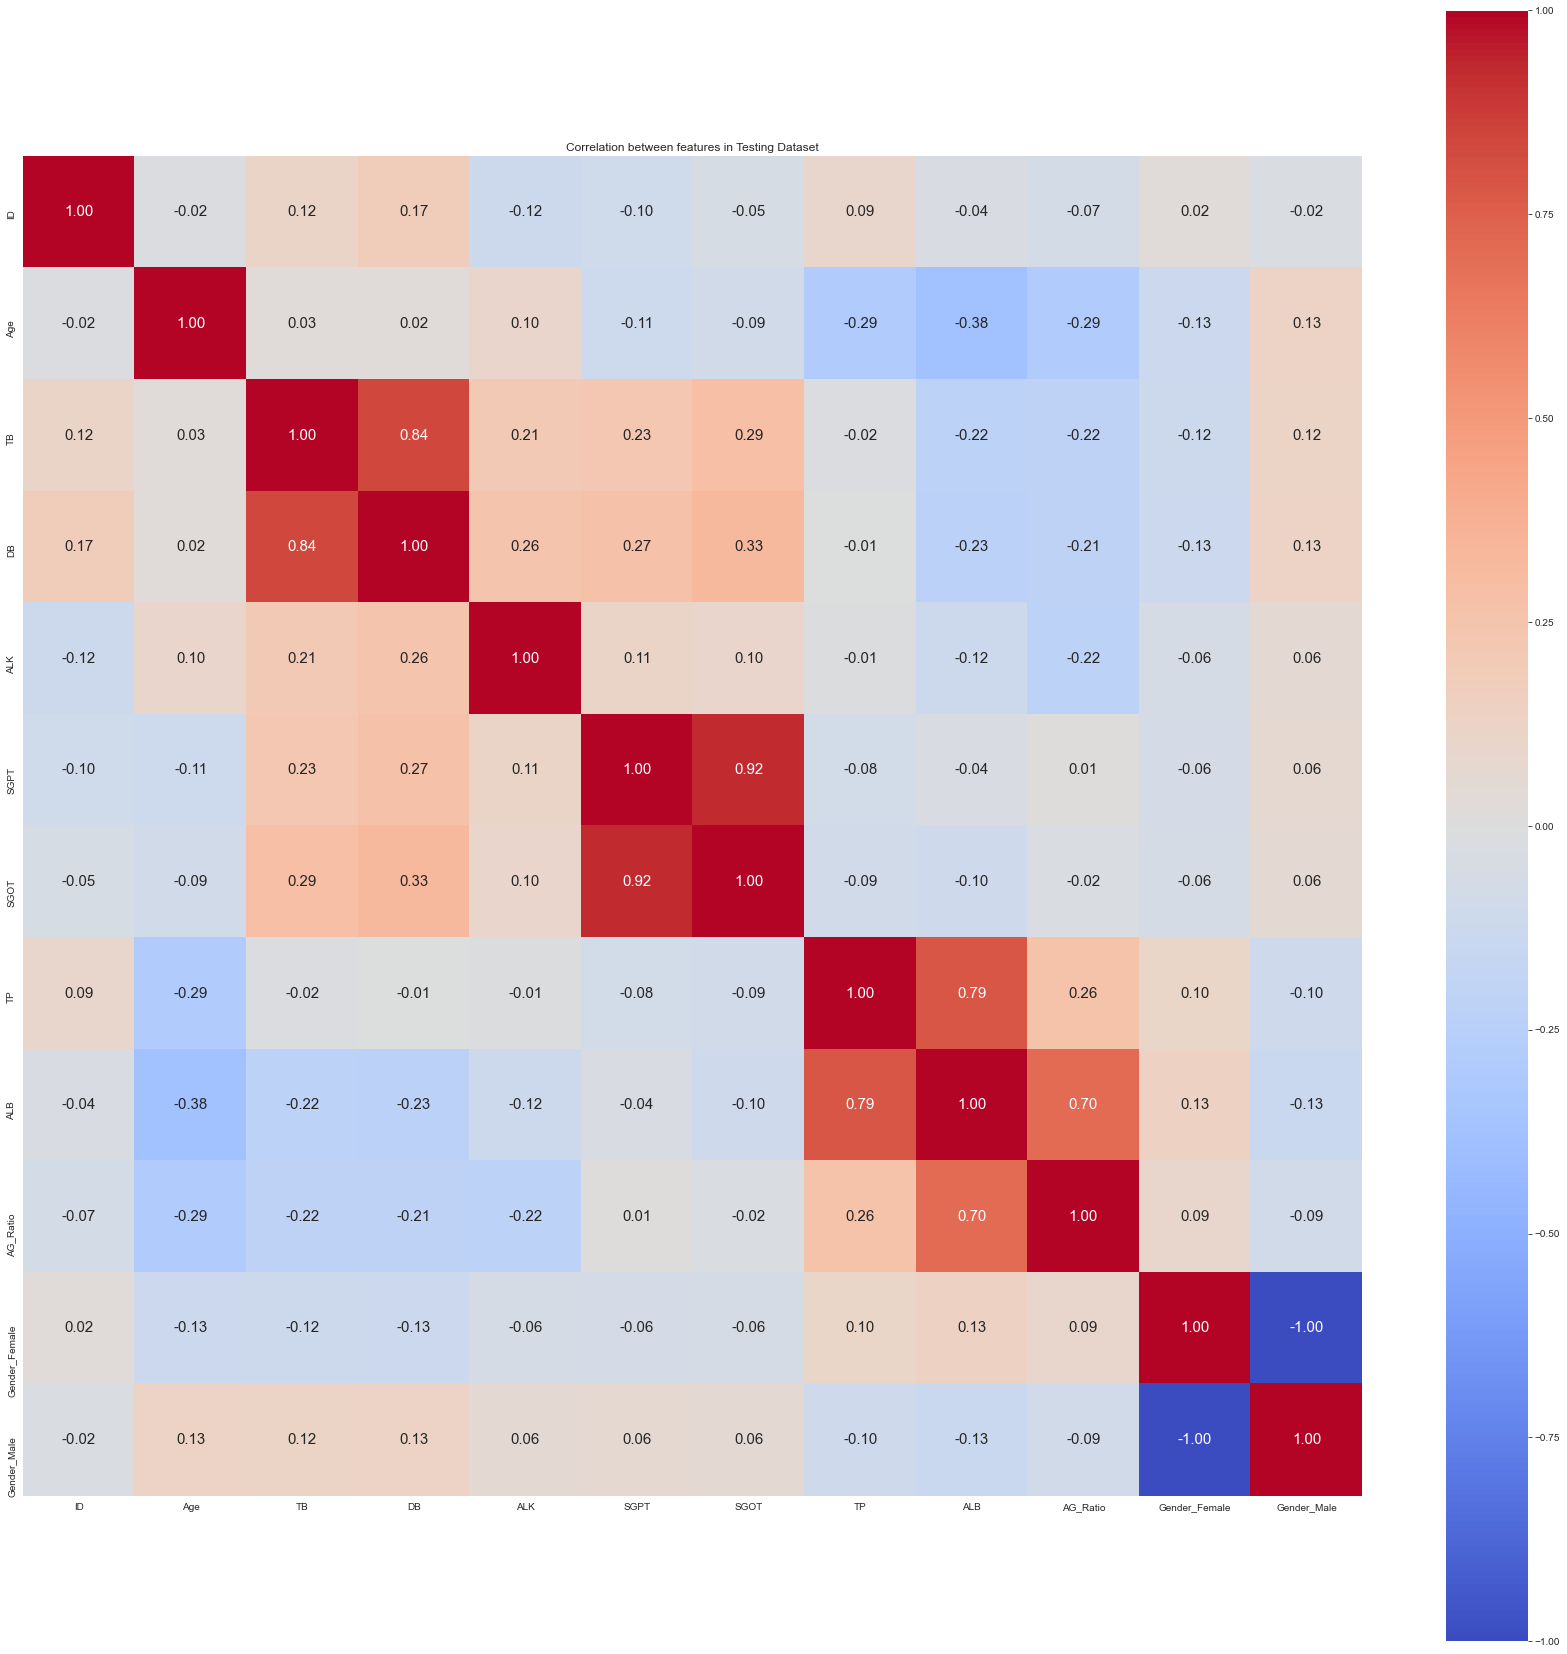

In [102]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr2, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features in Testing Dataset');

<a id='3'></a>
## 3)Feature Selection and Model Training

In [103]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

### "ID" is irrelavent in model evalution. So it will be discarded for feature importance identification

In [104]:
liver_train.dtypes

ID                 int64
Age                int64
TB               float64
DB               float64
ALK              float64
SGPT             float64
SGOT             float64
TP               float64
ALB              float64
AG_Ratio         float64
Class              int64
Gender_Female      uint8
Gender_Male        uint8
dtype: object

In [105]:
liver_train = liver_train.drop('ID', axis=1) #After running Once comment this statment

In [106]:
liver_test = liver_test.drop('ID', axis=1) #After running Once comment this statment

In [107]:
liver_train.columns

Index(['Age', 'TB', 'DB', 'ALK', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG_Ratio',
       'Class', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [108]:
liver_test.columns

Index(['Age', 'TB', 'DB', 'ALK', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG_Ratio',
       'Class', 'Gender_Female', 'Gender_Male'],
      dtype='object')

> Segmenting Dataset if only single dataset is given without segmenting into **Training Set** or **Testing Set**

In [109]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5334476843910806, random_state=101)
# print (X_train.shape)
# print (y_train.shape)
# print (X_test.shape)
# print (y_test.shape)

In [110]:
# separating the data and target
X_train = liver_train.drop(columns=['Class'],axis=1)
y_train = liver_train['Class']

In [111]:
X_train.head(10)

,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0,1
5,46,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,0,1
6,26,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,1,0
7,29,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1,0
8,17,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,0,1
9,55,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,0,1


In [112]:
# separating the data and target
X_test = liver_test.drop(columns=['Class'],axis=1)
y_test = liver_test['Class']

In [113]:
X_test.head(10)

,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187.000000,16.0,18.0,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699.000000,64.0,100.0,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490.000000,60.0,68.0,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182.000000,14.0,20.0,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195.000000,27.0,59.0,7.3,2.4,0.40,0,1
5,30,0.9,0.3,202.000000,15.0,11.0,6.7,3.1,1.10,1,0
6,17,0.9,0.3,276.025723,22.0,19.0,7.4,4.1,1.20,0,1
7,55,0.7,0.2,290.000000,53.0,58.0,6.8,3.4,1.00,0,1
8,64,0.9,0.3,310.000000,61.0,58.0,7.0,3.4,0.90,0,1
9,25,0.6,0.1,183.000000,91.0,53.0,5.5,2.3,0.70,0,1


In [114]:
test_AG=X_test['AG_Ratio'].mean()
test_AG

0.937724869927159

In [115]:
X_test['AG_Ratio']=X_test['AG_Ratio'].fillna(test_AG)

In [116]:
X_test.isnull().sum()

Age              0
TB               0
DB               0
ALK              0
SGPT             0
SGOT             0
TP               0
ALB              0
AG_Ratio         0
Gender_Female    0
Gender_Male      0
dtype: int64

In [117]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(583, 11)
(583,)
(311, 11)
(311,)


In [118]:
categories = ['Non-Diseased','Diseased']


<a id='3.1'></a>
### 3.1) Logistic Regression

`Model Training in Logistic Regression`

> Data training and evaluation Accuracy Score based on Training and Testing Dataset of the Patient

Logistic Regression Training Score: 
 71.87
Logistic Regression Test Score: 
 70.74
Coefficient: 
 [[ 0.01416801 -0.00634817  0.52248646  0.000941    0.01063743  0.00219246
   0.18083173 -0.39497011 -0.2542887  -0.26744798 -0.13388091]]
Intercept: 
 [-0.42060053]
Accuracy: 
 0.707395498392283
Confusion Matrix: 
 [[ 19  71]
 [ 20 201]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.21      0.29        90
           1       0.74      0.91      0.82       221

    accuracy                           0.71       311
   macro avg       0.61      0.56      0.55       311
weighted avg       0.67      0.71      0.66       311



<AxesSubplot:>

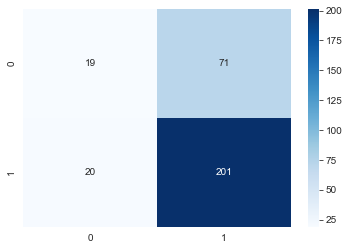

In [119]:
# Create logistic regression object
logreg = LogisticRegression()

# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,cmap="Blues",fmt="d")

In [120]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,TB,0.522486
6,SGOT,0.180832
0,ID,0.014168
4,ALK,0.010637
5,SGPT,0.002192
3,DB,0.000941
1,Age,-0.006348
10,Gender_Female,-0.133881
8,ALB,-0.254289
9,AG_Ratio,-0.267448


### Mean Square Error Calculating

In [121]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test,log_predicted)
 
print("MSE: %.2f" % mse1)

MSE: 0.29


### ROC Curve with Logistic Regression

1. ROC is receiver operationg characteristic. 

2. In this curve x axis is false positive rate and y axis is true positive rate
    If the curve in plot is closer to left-top corner, test is more accurate.

3. Roc curve score is auc that is computation area under the curve from prediction scores

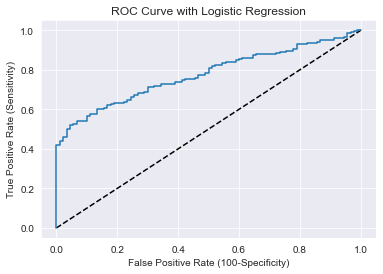

In [122]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Is a Liver Patient = 1 and Is Not a Liver Patient = 0

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (100-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve with Logistic Regression')
plt.show()

<a id='3.2'></a>
### 3.2) Gaussian Naive Bayes

Gaussian Score: 
 55.57
Gaussian Test Score: 
 56.27
Accuracy: 
 0.5627009646302251
[[ 87   3]
 [133  88]]
              precision    recall  f1-score   support

           0       0.40      0.97      0.56        90
           1       0.97      0.40      0.56       221

    accuracy                           0.56       311
   macro avg       0.68      0.68      0.56       311
weighted avg       0.80      0.56      0.56       311



<AxesSubplot:>

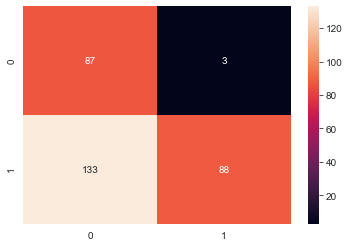

In [123]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),fmt='d',annot=True)

### ROC Curve with  Gaussian Naive Bayes

1. ROC is receiver operationg characteristic. 

2. In this curve x axis is false positive rate and y axis is true positive rate
    If the curve in plot is closer to left-top corner, test is more accurate.

3. Roc curve score is auc that is computation area under the curve from prediction scores

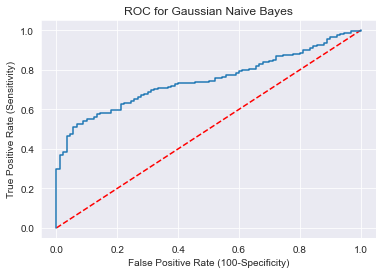

In [124]:
# ROC Curve with Gaussian Naive Bayes

# Is a Liver Patient = 1 and Is Not a Liver Patient = 0

y_pred_gaussian = gaussian.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gaussian)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (100-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Gaussian Naive Bayes')
plt.show()

### Mean Square Error Calculating

In [125]:
mse_gus = mean_squared_error(y_test,y_pred_gaussian)
 
print("MSE: %.2f" % mse_gus)

MSE: 0.42


<a id='3.3'></a>
### 3.3) Random Forest

Random Forest Score: 
 100.0
Random Forest Test Score: 
 99.68
Accuracy: 
 0.9967845659163987
[[ 89   1]
 [  0 221]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       1.00      1.00      1.00       221

    accuracy                           1.00       311
   macro avg       1.00      0.99      1.00       311
weighted avg       1.00      1.00      1.00       311



<AxesSubplot:>

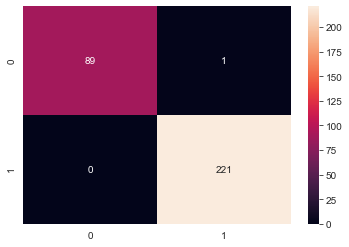

In [126]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

sns.heatmap(confusion_matrix(y_test,rf_predicted),fmt='d',annot=True)

### Mean Square Error Calculating

In [127]:
mse2 = mean_squared_error(y_test,rf_predicted)
 
print("MSE: %.2f" % mse2)

MSE: 0.00


### ROC Curve with  Random Forest 

1. ROC is receiver operationg characteristic. 

2. In this curve x axis is false positive rate and y axis is true positive rate
    If the curve in plot is closer to left-top corner, test is more accurate.

3. Roc curve score is auc that is computation area under the curve from prediction scores

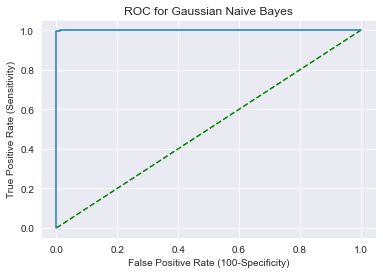

In [128]:
# ROC Curve with Random Forest

# Is a Liver Patient = 1 and Is Not a Liver Patient = 0

y_pred_random = random_forest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_random)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'g--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (100-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Gaussian Naive Bayes')
plt.show()

<a id='3.4'></a>
### 3.4) Support Vector Machine

In [129]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, SVC_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.7135506003430532
Test Accuracy of SVC Model is 0.7106109324758842


SVC Model Score: 
 71.355060034305
SVC Model Test Score: 
 71.061093247588
Accuracy: 
 0.7106109324758842
[[  0  90]
 [  0 221]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.71      1.00      0.83       221

    accuracy                           0.71       311
   macro avg       0.36      0.50      0.42       311
weighted avg       0.50      0.71      0.59       311



<AxesSubplot:>

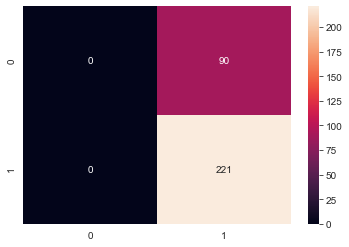

In [130]:
svc_score = round(svc.score(X_train, y_train) * 100, 12)
svc_score_test = round(svc.score(X_test, y_test) * 100, 12)
print('SVC Model Score: \n',svc_score)
print('SVC Model Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(y_test,SVC_pred))
print(confusion_matrix(y_test,SVC_pred))
print(classification_report(y_test,SVC_pred))

sns.heatmap(confusion_matrix(y_test,SVC_pred),fmt='d',annot=True)

### Mean Square Error Calculating

In [131]:
mse_SVC_pred= mean_squared_error(y_test,rf_predicted)
 
print("MSE: %.2f" % mse_SVC_pred)

MSE: 0.00


### ROC Curve with  Support Vector Machine

1. ROC is receiver operationg characteristic. 

2. In this curve x axis is false positive rate and y axis is true positive rate
    If the curve in plot is closer to left-top corner, test is more accurate.

3. Roc curve score is auc that is computation area under the curve from prediction scores

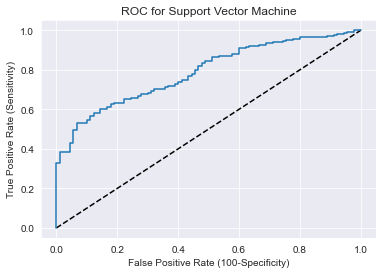

In [132]:
# ROC Curve with Support Vector Machine

# Is a Liver Patient = 1 and Is Not a Liver Patient = 0
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC_pred = svc.predict(X_test)

y_pred_svc = svc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_svc)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (100-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Support Vector Machine')
plt.show()

### Mean Square Error Calculating

In [133]:
mse_SVC_pred= mean_squared_error(y_test,rf_predicted)
 
print("MSE: %.2f" % mse_SVC_pred)

MSE: 0.00


<a id='3.5'></a>
### 3.5) KNN

> Using scikit-learn’s **MinMaxScaler** as the feature matrix is a mix of **binary and continuous features** . Other alternatives includes StandardScaler

In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
mms = MinMaxScaler()
mms.fit(liver_train)
data_transformed = mms.transform(liver_train)

In [136]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

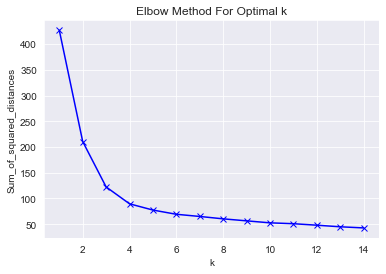

In [137]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

> According to the Elbow plot we can find out that the ideal k values for the **dataset is 4**

In [138]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier(n_neighbors=4) #No of neighbours including 4 
kfitModel = k_model.fit(X_train, y_train)

# accuracy score on training data

kX_train_prediction = kfitModel.predict(X_train)
training_data_accuray = accuracy_score(kX_train_prediction,y_train)
print('Accuracy on training data  : ', training_data_accuray)

# accuracy score on testing data
kX_test_prediction = kfitModel.predict(X_test)
kx_lgr_test_data_accuray = accuracy_score(kX_test_prediction,y_test)
print('Accuracy on test data      : ', kx_lgr_test_data_accuray)

Accuracy on training data  :  0.7701543739279588
Accuracy on test data      :  0.7588424437299035


In [139]:
kfitModel

KNeighborsClassifier(n_neighbors=4)

In [140]:
knn_score = round(k_model.score(X_train, y_train) * 100, 12)
knn_score_test = round(k_model.score(X_test, y_test) * 100, 12)
print('KNN Model Score: \n',knn_score )
print('KNN Model Test Score: \n', knn_score_test)

# print('Accuracy: \n', accuracy_score(y_test,kX_train_prediction))
# print(confusion_matrix(y_test,kX_train_prediction))
# print(classification_report(y_test,kX_train_prediction))

# sns.heatmap(confusion_matrix(y_test,kX_train_prediction),fmt='d',annot=True)

KNN Model Score: 
 77.015437392796
KNN Model Test Score: 
 75.88424437299


<a id='3.6'></a>
### 3.6) Gradient Boosting Classifier

> **Hyper Parameters Tuning**

In [141]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [142]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)


{'learning_rate': 0.001, 'loss': 'deviance', 'n_estimators': 100}
0.7135573239021515


In [143]:
gb = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(y_test, gb_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 1.0
Test Accuracy of Gradient Boosting Classifier Model is 0.9935691318327974


### Mean Square Error Calculating

In [144]:
mse_gb_pred= mean_squared_error(y_test,rf_predicted)
 
print("MSE: %.2f" % mse_gb_pred)

MSE: 0.00


In [145]:
# confusion matrix

confusion_matrix(y_test, gb_pred)

array([[ 89,   1],
       [  1, 220]], dtype=int64)

Gradient Boosting Score: 
 100.0
Gradient Boosting Test Score: 
 99.35691318328
Accuracy: 
 0.9935691318327974
[[ 89   1]
 [  1 220]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       1.00      1.00      1.00       221

    accuracy                           0.99       311
   macro avg       0.99      0.99      0.99       311
weighted avg       0.99      0.99      0.99       311



<AxesSubplot:>

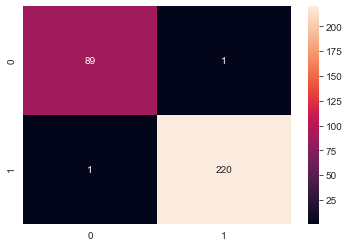

In [146]:
gb_score = round(gb.score(X_train, y_train) * 100, 12)
gb_score_test = round(gb.score(X_test, y_test) * 100, 12)
print('Gradient Boosting Score: \n',gb_score)
print('Gradient Boosting Test Score: \n', gb_score_test)
print('Accuracy: \n', accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

sns.heatmap(confusion_matrix(y_test,gb_pred),fmt='d',annot=True)

<AxesSubplot:>

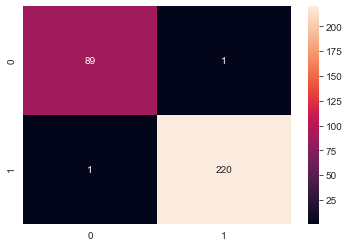

In [147]:
sns.heatmap(confusion_matrix(y_test,gb_pred),fmt='d',annot=True)

### ROC Curve with Gradient Boosting Classifier

1. ROC is receiver operationg characteristic. 

2. In this curve x axis is false positive rate and y axis is true positive rate
    If the curve in plot is closer to left-top corner, test is more accurate.

3. Roc curve score is auc that is computation area under the curve from prediction scores

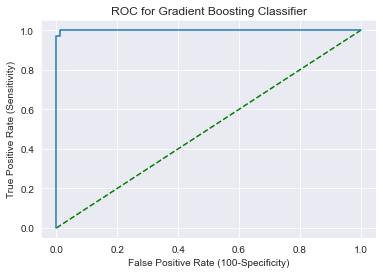

In [148]:
# ROC Curve with Gradient Boosting Classifier

# Is a Liver Patient = 1 and Is Not a Liver Patient = 0

y_pred_gb = gb .predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_gb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'g--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (100-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Gradient Boosting Classifier')
plt.show()

<a id='3.7'></a>
### 3.7) XGB Classifier

In [149]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, xgb_pred)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")

[17:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy of XGB Model is 0.7238421955403087
Test Accuracy of XGB Model is 0.7009646302250804


In [150]:
xgb_score = round(xgb.score(X_train, y_train) * 100, 12)
xgb_score_test = round(xgb.score(X_test, y_test) * 100, 12)
print('XGB Classifier Score: \n',svc_score)
print('XGB Classifier test Score: \n', xgb_score_test)
print('Accuracy: \n', accuracy_score(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

XGB Classifier Score: 
 71.355060034305
XGB Classifier test Score: 
 70.096463022508
Accuracy: 
 0.7009646302250804
[[ 17  73]
 [ 20 201]]
              precision    recall  f1-score   support

           0       0.46      0.19      0.27        90
           1       0.73      0.91      0.81       221

    accuracy                           0.70       311
   macro avg       0.60      0.55      0.54       311
weighted avg       0.65      0.70      0.65       311



### ROC Curve with XGB Classifier

1. ROC is receiver operationg characteristic. 

2. In this curve x axis is false positive rate and y axis is true positive rate
    If the curve in plot is closer to left-top corner, test is more accurate.

3. Roc curve score is auc that is computation area under the curve from prediction scores

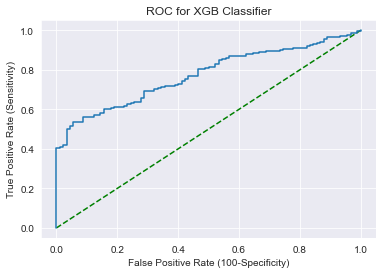

In [151]:
# ROC Curve with XGB Classifier

# Is a Liver Patient = 1 and Is Not a Liver Patient = 0

y_pred_xgb = xgb .predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_xgb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'g--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (100-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for XGB Classifier')
plt.show()

<AxesSubplot:>

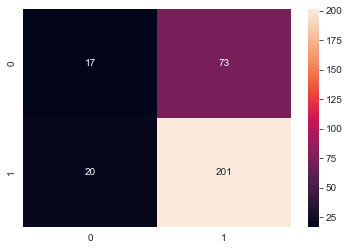

In [152]:
sns.heatmap(confusion_matrix(y_test,xgb_pred),fmt='d',annot=True)

In [153]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','Support Vector Machine','KNN','Gradient Booster','Xgboost'],
    'Score': [ logreg_score, gauss_score, random_forest_score,svc_score,knn_score,gb_score,xgb_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test,svc_score_test,knn_score_test,gb_score_test,xgb_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Random Forest,100.000000,99.680000
5,Gradient Booster,100.000000,99.356913
4,KNN,77.015437,75.884244
3,Support Vector Machine,71.355060,71.061093
0,Logistic Regression,71.870000,70.740000
6,Xgboost,72.384220,70.096463
1,Gaussian Naive Bayes,55.570000,56.270000


In [154]:
import plotly.express as px
fig = px.bar(models, x='Model', y='Test Score',text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

<a id='4'></a>
# 4) Gradient Boosting gives us the best result so we will save this model for building Predictive Analysis.

In [155]:
import pickle

In [156]:
# save the model to disk
filename = 'LiverPatient_model.sav'
pickle.dump(models, open(filename, 'wb'))

In [157]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

,Model,Score,Test Score
0,Logistic Regression,71.870000,70.740000
1,Gaussian Naive Bayes,55.570000,56.270000
2,Random Forest,100.000000,99.680000
3,Support Vector Machine,71.355060,71.061093
4,KNN,77.015437,75.884244
5,Gradient Booster,100.000000,99.356913
6,Xgboost,72.384220,70.096463


<a id='4.1'></a>
## 4.1) Create Pickle File for Gradient Boosting Classifier

In [158]:
import pickle
# open a file, where you ant to store the data
file = open('LiverPatient_model.pkl', 'wb')

# dump information to that file
pickle.dump(gb, file)  #Selecting Logistic Regression as the Model because of Giving highest Accuracy

In [159]:
#Reading the Pickle file for to certify model was imported Successfully
model = open('LiverPatient_model.pkl','rb')
gradient= pickle.load(model)

In [160]:
# Prediction Parameters testing using the imported Model
y_prediction = gradient.predict(X_test)

In [161]:
gb_acc = accuracy_score(Y_test, y_prediction)

In [162]:
gb_acc

0.9935691318327974

<a id='5'></a>
# 5) Creation of Linear Regression to make accurate model Based on Feature Importance.

In [163]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier(n_estimators=100)
randf.fit(X_train,y_train)
y_pred=randf.predict(X_test)

In [164]:
randf.feature_importances_

array([0.1338406 , 0.1007592 , 0.08453868, 0.13704613, 0.13308908,
       0.1277198 , 0.0898355 , 0.08931107, 0.07809101, 0.01258667,
       0.01318225])

<a id='5.1'></a>
## 5.1) Feature Importance analysis for filter out important variables

In [165]:
features = liver_train.columns.values.tolist()[0:11] #Dropping Dependent Variable Lung Cancer 
feature_pro = pd.Series(randf.feature_importances_,index=features).sort_values(ascending=False)

In [166]:
feature_pro 

ALK              0.137046
Age              0.133841
SGPT             0.133089
SGOT             0.127720
TB               0.100759
TP               0.089835
ALB              0.089311
DB               0.084539
AG_Ratio         0.078091
Gender_Female    0.013182
Class            0.012587
dtype: float64

No handles with labels found to put in legend.


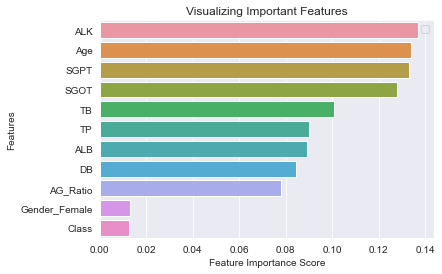

In [167]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_pro, y=feature_pro.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Since Gradeint Boosting got the Highest accuracy rate , creating the model **using Gradeint Boosting**

In [168]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [169]:
gbr = GradientBoostingRegressor(n_estimators=180, 
    learning_rate=1, 
    min_samples_split=3)
# with default parameters
gbr = GradientBoostingRegressor()

In [170]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [171]:
gbr_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test,gbr_pred)
 
print("MSE: %.2f" % mse)

MSE: 0.09


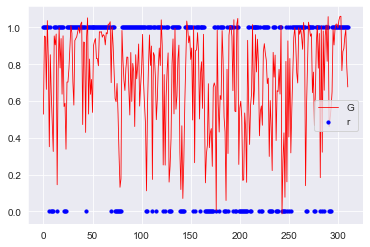

In [172]:
X_ax = range(len(y_test))
plt.scatter(X_ax, y_test, s=10, color="blue", label="Original")
plt.plot(X_ax, gbr_pred, lw=0.8, color="red", label="Predicted")
plt.legend('Gradient Boosting Regression with Testing Dataset')
plt.show()

In [173]:
# gb = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)
# gb.fit(X_train, y_train)

# gb_pred = gb.predict(X_test)

# gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
# gb_test_acc = accuracy_score(y_test, gb_pred)

# print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
# print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

In [174]:
from sklearn.feature_selection import RFE
rfe =RFE(gb, n_features_to_select=5)
rfe.fit(X,Y)

RFE(estimator=GradientBoostingClassifier(learning_rate=1, loss='exponential',
                                         n_estimators=180),
    n_features_to_select=5)

<a id='5.2'></a>
## 5.2) Accurate Model Building with Liner regression with highest Important features

In [175]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)

#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

from sklearn.feature_selection import RFE
rfe =RFE(linear, n_features_to_select=4)
rfe.fit(X,Y)

Linear Regression Score: 
 12.27
Linear Regression Test Score: 
 15.32
Coefficient: 
 [ 3.23507090e-03 -1.38040598e-04  2.25227611e-02  1.93373611e-04
  4.01412960e-04 -7.16038783e-05  8.61224511e-02 -1.58302566e-01
  7.48270987e-02 -2.47698634e-02  2.47698634e-02]
Intercept: 
 0.30963133572233165


RFE(estimator=LinearRegression(), n_features_to_select=4)

In [176]:
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(X.columns.values[i])

DB
TP
ALB
Gender_Male


In [182]:
liver_train.head(5)

,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class,Gender_Female,Gender_Male
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,0,1


In [183]:
#I'm considering seven important features based on recursive feature elimination
#finX = liver_df[['Age','Direct_Bilirubin','Total_Protiens','Albumin', 'Gender_Female', 'Gender_Male']]
finX = liver_train[['DB','TP','ALB', 'Gender_Male']]
finX.head(10)

,DB,TP,ALB,Gender_Male
0,0.1,6.8,3.3,0
1,5.5,7.5,3.2,1
2,4.1,7.0,3.3,1
3,0.4,6.8,3.4,1
4,2.0,7.3,2.4,1
5,0.7,7.6,4.4,1
6,0.2,7.0,3.5,0
7,0.3,6.7,3.6,0
8,0.3,7.4,4.1,1
9,0.2,6.8,3.4,1


In [184]:
# X_train, X_test, y_train, y_test = train_test_split(finX, Y, test_size=0.30, random_state=101)

<a id='5.3'></a>
## 5.3) Newly Selected Features using for Logsitic Regression Model Building

In [185]:
finy = liver_train['Class']
X_test = liver_test[['DB','TP','ALB', 'Gender_Male']]
y_test = liver_test['Class']

Logistic Regression Training Score: 
 71.53
Logistic Regression Test Score: 
 71.06
Coefficient: 
 [[ 0.80222778  0.3607247  -0.65499605  0.1442195 ]]
Intercept: 
 [-0.00834891]
Accuracy: 
 0.7106109324758842
Confusion Matrix: 
 [[  5  85]
 [  5 216]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.06      0.10        90
           1       0.72      0.98      0.83       221

    accuracy                           0.71       311
   macro avg       0.61      0.52      0.46       311
weighted avg       0.65      0.71      0.62       311



<AxesSubplot:>

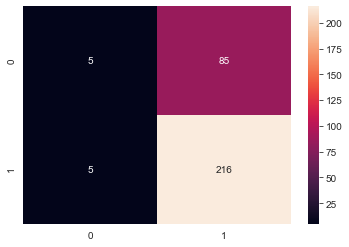

In [186]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(finX, finy)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(finX, finy) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")
